In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
dataset_path = 'review_with_aspect.jsonl'
data = []
with open(dataset_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
df = pd.DataFrame(data)
print(f"Loaded {len(df)} reviews.")
display(df.head())

Loaded 25986 reviews.


,id,text,labels
0,ICLR_2020_1123,This work studies the predictive uncertainty i...,"[[0, 1029, summary], [1030, 1201, motivation_p..."
1,ICLR_2018_813,Summary : This paper proposes a new approach t...,"[[10, 1038, summary], [1054, 1082, motivation_..."
2,NIPS_2019_796,The paper proposes a graph neural network base...,"[[0, 469, summary], [470, 532, clarity_positiv..."
3,ICLR_2018_726,Summary : This paper proposes an encoder-decod...,"[[10, 599, summary], [870, 1076, substance_neg..."
4,NIPS_2016_477,The authors present sharp criteria for l_1-spa...,"[[0, 1223, summary], [1314, 1354, soundness_po..."


In [8]:
#Basic Review Statistics
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
print(f"\nAverage text length (in words): {df['text_length'].mean():.2f}")
print(f"Minimum text length (in words): {df['text_length'].min()}")
print(f"Maximum text length (in words): {df['text_length'].max()}")


Average text length (in words): 419.81
Minimum text length (in words): 16
Maximum text length (in words): 1370


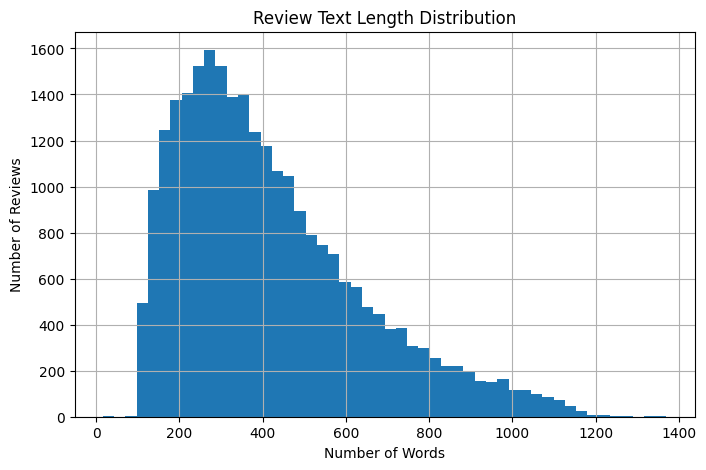

In [23]:
# Plot review text length distribution
plt.figure(figsize=(8,5))
df['text_length'].hist(bins=50)
plt.title('Review Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.savefig('review_text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [10]:
#Aspect Label Distribution
all_labels = []
for labels in df['labels']:
    all_labels.extend([label[2] for label in labels])

label_counter = Counter(all_labels)
print("\nAspect Label Distribution:")
for label, count in label_counter.items():
    print(f"{label}: {count}")


Aspect Label Distribution:
summary: 23946
motivation_positive: 11121
clarity_positive: 13095
soundness_negative: 15662
substance_negative: 11717
meaningful_comparison_negative: 9242
soundness_positive: 12780
clarity_negative: 15697
originality_negative: 8745
originality_positive: 11606
replicability_negative: 4548
substance_positive: 4669
meaningful_comparison_positive: 1488
replicability_positive: 271
motivation_negative: 3499


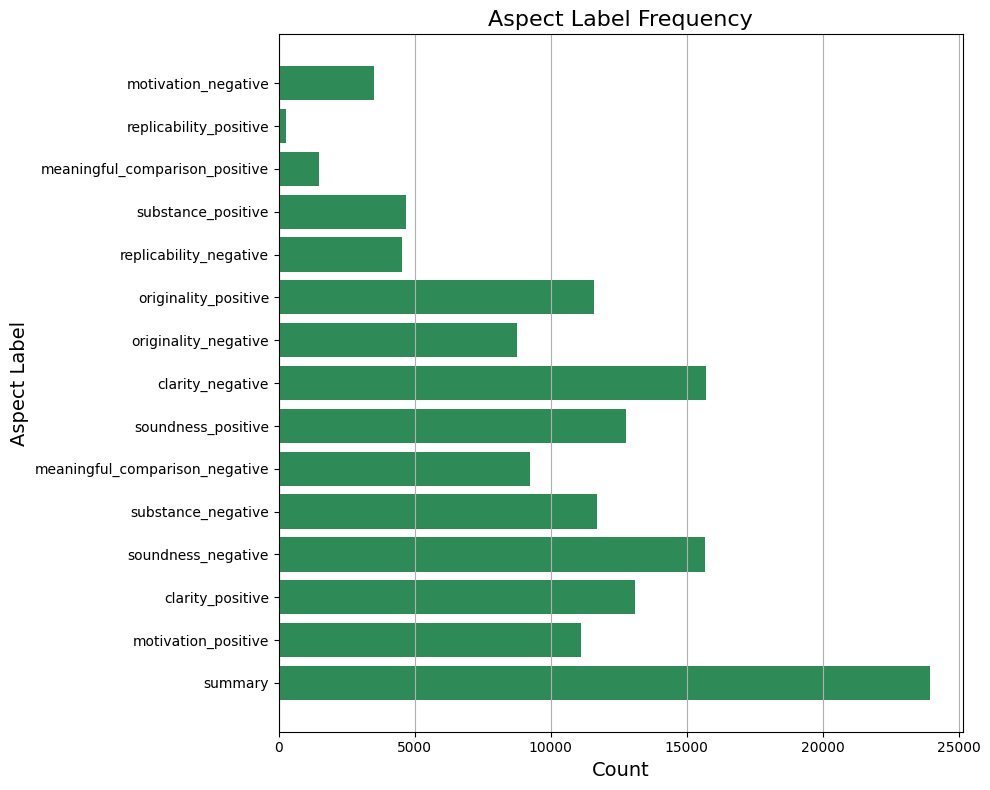

In [24]:
# Horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(list(label_counter.keys()), list(label_counter.values()), color='seagreen')
plt.title('Aspect Label Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Aspect Label', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('aspect_label_frequency.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [12]:
#Missing Value Check
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
id             0
text           0
labels         0
text_length    0
dtype: int64



Sentiment Distribution:
neutral: 23946
positive: 55030
negative: 69110


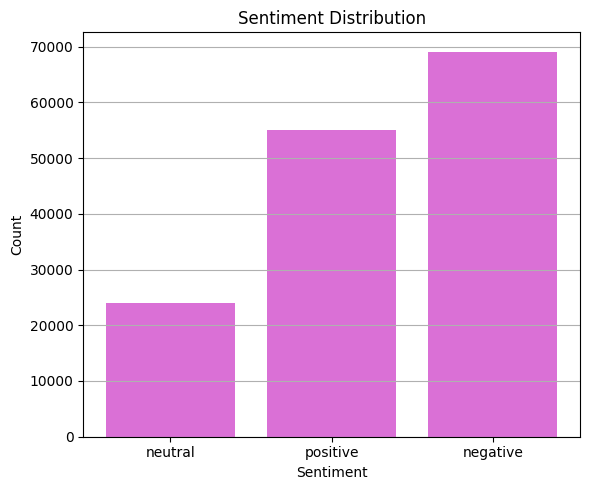

In [25]:
# Sentiment distribution analysis
sentiments = []

for labels in df['labels']:
    for label in labels:
        aspect = label[2]
        if '_positive' in aspect:
            sentiments.append('positive')
        elif '_negative' in aspect:
            sentiments.append('negative')
        else:
            sentiments.append('neutral')  # for 'summary' or similar

from collections import Counter
sentiment_counter = Counter(sentiments)

print("\nSentiment Distribution:")
for sentiment, count in sentiment_counter.items():
    print(f"{sentiment}: {count}")

# Plot sentiment distribution
plt.figure(figsize=(6,5))
plt.bar(sentiment_counter.keys(), sentiment_counter.values(), color='orchid')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


Top 20 Most Common Words:
the: 722750
.: 431353
,: 377392
of: 254973
to: 247011
is: 233964
and: 193636
a: 192965
in: 183118
): 133244
(: 121272
this: 113343
that: 112707
for: 105243
paper: 93974
it: 91830
be: 86660
i: 84540
are: 79148
on: 77536


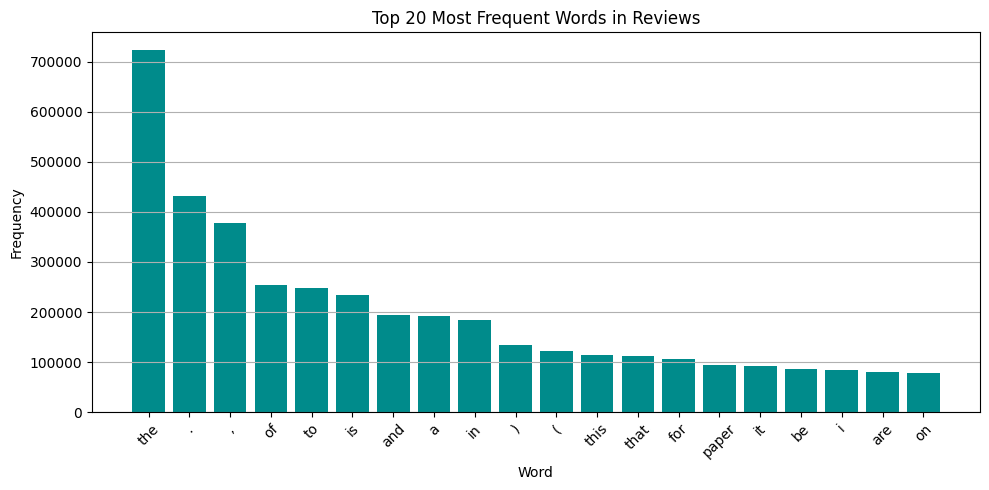

In [26]:
# Word frequency analysis
from collections import Counter

all_words = []
for text in df['text']:
    words = text.lower().split()
    all_words.extend(words)

word_counter = Counter(all_words)
common_words = word_counter.most_common(20)

print("\nTop 20 Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Plot Top 20 words
words, freqs = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs, color='darkcyan')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('most_frequent_words.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [16]:
# Top 5 shortest reviews
print("\nShortest Reviews:")
display(df.sort_values('text_length').head(5)[['id', 'text', 'text_length']])

# Top 5 longest reviews
print("\nLongest Reviews:")
display(df.sort_values('text_length', ascending=False).head(5)[['id', 'text', 'text_length']])



Shortest Reviews:


,id,text,text_length
400,ICLR_2020_751,I support desk rejection since violating doubl...,16
18798,ICLR_2020_687,This paper offers a beautiful and simple metho...,20
25743,ICLR_2020_700,This paper unfortunately violates the blind-re...,20
19987,ICLR_2020_284,Good ideas Important area Impressive results ....,32
6491,ICLR_2020_698,While this paper tackles an interesting proble...,36



Longest Reviews:


,id,text,text_length
16952,ICLR_2020_1915,Summary : This paper proposes a lightweight al...,1370
23638,ICLR_2020_556,# # # # # # # # # # # # # # # # # # # # # # # ...,1365
4624,NIPS_2018_713,Overall assessment : I consider this work to b...,1354
16838,NIPS_2019_1089,* * * * * * * * * * * * * * * * * * * * * * * ...,1323
9715,NIPS_2017_583,The authors of the article consider phase retr...,1276
